#### Load and Inspect the data

In [1]:
#import libraries

import pandas as pd 
import numpy as np
from featurewiz import featurewiz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error 
import warnings


Imported version = 0.1.91.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                


In [2]:
bank_data   = pd.read_csv('bank-additional-full.csv', delimiter=";")
bank_data


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### Exploratory Data Analysis


In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
#check for unique values 
for col in bank_data.columns:
    print(col)
    print('------')
    print(bank_data[col].unique())

age
------
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job
------
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
------
['married' 'single' 'divorced' 'unknown']
education
------
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
------
['no' 'unknown' 'yes']
housing
------
['no' 'yes' 'unknown']
loan
------
['no' 'yes' 'unknown']
contact
------
['telephone' 'cellular']
month
------
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
------
['mon' 'tue' 'wed' 'thu' 'fri']
duration
------
[ 261  149  226 ... 1246 1556 1868]
campaign
------
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 

In [5]:

#total counts of unique values
new_list = ['job', 'marital', 'education', 'default', 'housing', 'loan']


for col in new_list:
    print(col)
  
    print(bank_data[col].value_counts())
    print('------')



job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
------
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
------
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
------
default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
------
housing
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
------
loan
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
------


#### Feature Engineering And Feature Selection Using Featurewiz

In [6]:
#encode the target variable
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
bank_data['y'] = encoder.fit_transform(bank_data['y'])

In [7]:
#splitting data and feature selection

X = bank_data.drop(['y'], axis=1)
y = bank_data['y']

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=23)
target = 'y'

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (41188, 21)
    Loaded train data. Shape = (41188, 21)
    Some column names had special characters which were removed...
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Binary_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ##################

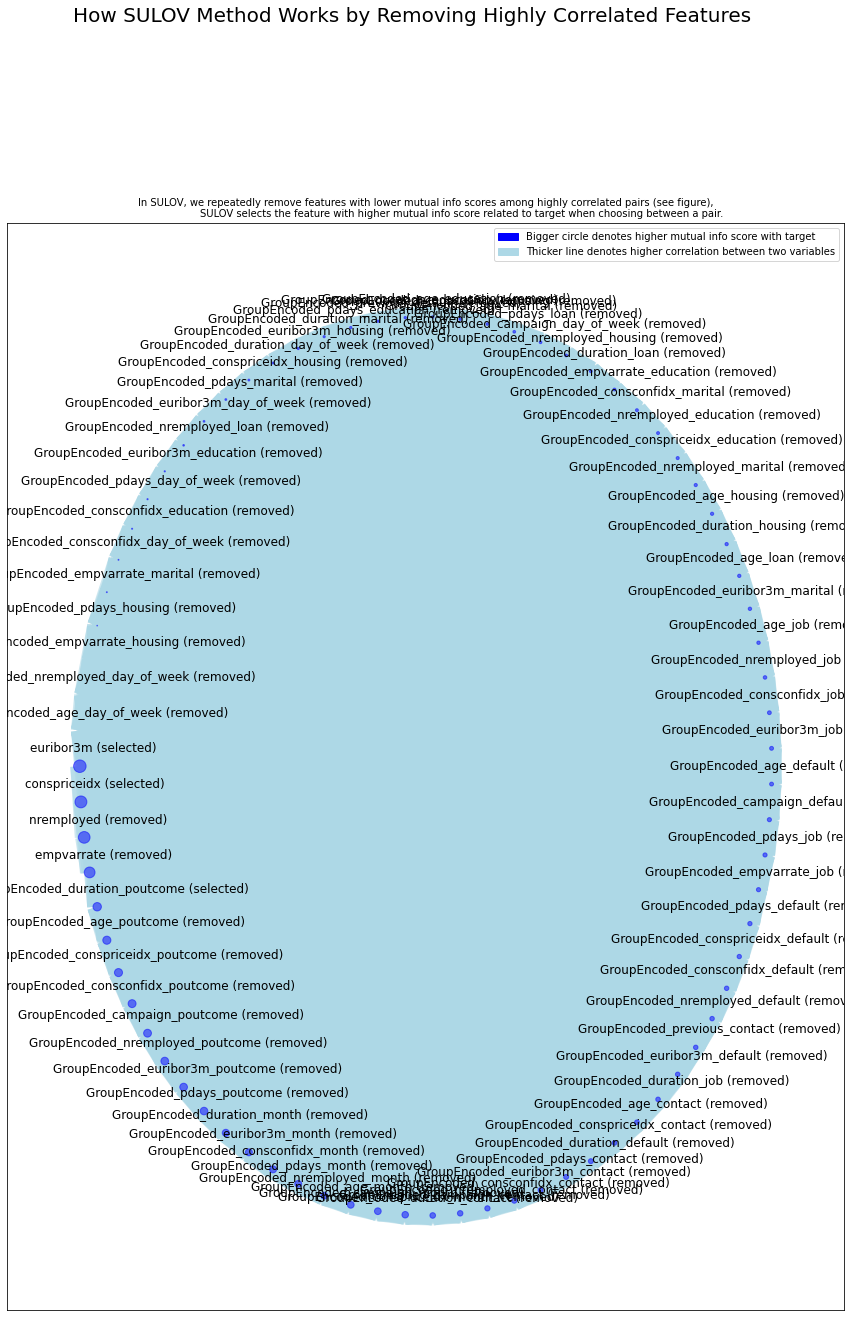

Time taken for SULOV method = 26 seconds
    Adding 0 categorical variables to reduced numeric variables  of 14
Final list of selected vars after SULOV = 14
Readying dataset for Recursive XGBoost by converting all features to numeric...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Since ['groupby'] category encoding is done, dropping original categorical vars from predictors...
Current number of predictors = 14 
    XGBoost version using 1.6.1 as tree method: hist
Number of booster rounds = 100
        using 14 variables...
            Time taken for regular XGBoost feature selection = 0 seconds
        using 11 variables...
            Time taken for regular XG

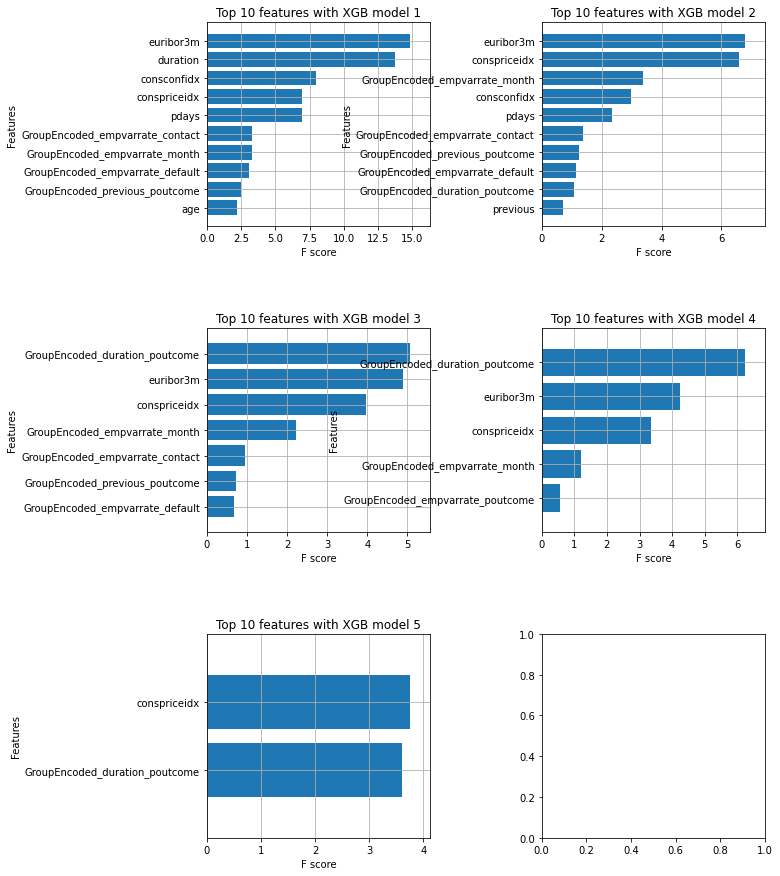

            Total time taken for XGBoost feature selection = 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 14 important features:
['euribor3m', 'duration', 'consconfidx', 'conspriceidx', 'pdays', 'GroupEncoded_empvarrate_contact', 'GroupEncoded_empvarrate_month', 'GroupEncoded_empvarrate_default', 'GroupEncoded_previous_poutcome', 'age', 'campaign', 'GroupEncoded_duration_poutcome', 'previous', 'GroupEncoded_empvarrate_poutcome']

    Time taken for feature selection = 35 seconds
Returning 2 dataframes: dataname and test_data with 14 important features.


In [8]:
#using featurewiz for feature engg and feature selection
features, train = featurewiz(bank_data, target, corr_limit=0.7, verbose=2, sep="", header=0,  test_data="", feature_engg="groupby", category_encoders="OneHotEncoders")

In [9]:
#See the selected features and finally data
print(features)
print('=======')
print(train)

['euribor3m', 'duration', 'consconfidx', 'conspriceidx', 'pdays', 'GroupEncoded_empvarrate_contact', 'GroupEncoded_empvarrate_month', 'GroupEncoded_empvarrate_default', 'GroupEncoded_previous_poutcome', 'age', 'campaign', 'GroupEncoded_duration_poutcome', 'previous', 'GroupEncoded_empvarrate_poutcome']
       euribor3m  duration  consconfidx  conspriceidx  pdays  \
0          4.857     261.0        -36.4        93.994  999.0   
1          4.857     149.0        -36.4        93.994  999.0   
2          4.857     226.0        -36.4        93.994  999.0   
3          4.857     151.0        -36.4        93.994  999.0   
4          4.857     307.0        -36.4        93.994  999.0   
...          ...       ...          ...           ...    ...   
41183      1.028     334.0        -50.8        94.767  999.0   
41184      1.028     383.0        -50.8        94.767  999.0   
41185      1.028     189.0        -50.8        94.767  999.0   
41186      1.028     442.0        -50.8        94.767  9

#### Process to Choose the best Classifier Using the Metrics `Accuracy_score` And `MAE`

In [10]:
#train data and split
train = train.dropna(axis=0)
#split data

X_new = train.drop(['y'], axis=1)
y = train['y']

X_train, X_test, Y_train, Y_test = train_test_split(X_new, y, test_size=0.3, random_state=12)


In [11]:
# Selecting the best Classifier 
classifiers = [KNeighborsClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]

for model in classifiers:
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print(model)
    print("\tAccuracy_score :", accuracy_score(Y_pred, Y_test))
    print("\tMean absolute Score:", mean_absolute_error(Y_pred, Y_test))
    print('======')

KNeighborsClassifier()
	Accuracy_score : 0.9020738492665655
	Mean absolute Score: 0.0979261507334345
GradientBoostingClassifier()
	Accuracy_score : 0.9152250885179565
	Mean absolute Score: 0.0847749114820435
DecisionTreeClassifier()
	Accuracy_score : 0.8940819423368741
	Mean absolute Score: 0.10591805766312595
RandomForestClassifier()
	Accuracy_score : 0.9140111279716743
	Mean absolute Score: 0.08598887202832575


#### TAKEAWAY
- GradientBoostingClassifier is the best classifier for this dataset, it has the highest accuracy_score and least MAE 
- RandomForestClassifier is the second best.
